## Vocabulary Reduction after Stemming vs Lemmatization
This visualization shows how much the vocabulary shrinks
after applying stemming and lemmatization on the same text corpus.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


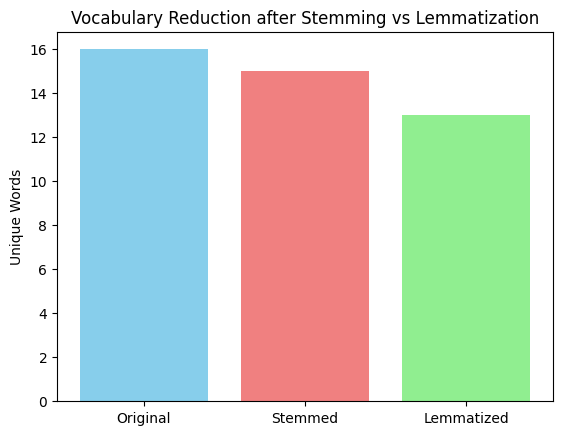

In [2]:
# Import required libraries
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

# Download resources for lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stemmer and lemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example corpus
corpus = [
    "The foxes were running faster than the wolves.",
    "A fox ran swiftly through the forest.",
    "Running foxes are faster than lazy dogs."
]

# Tokenize words from corpus
tokens = [word.lower().strip(".") for line in corpus for word in line.split()]

# Apply stemming and lemmatization
stems = [ps.stem(w) for w in tokens]
lemmas = [lemmatizer.lemmatize(w, pos='v') for w in tokens]

# Plot the comparison
plt.bar(["Original", "Stemmed", "Lemmatized"],
        [len(set(tokens)), len(set(stems)), len(set(lemmas))],
        color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Vocabulary Reduction after Stemming vs Lemmatization")
plt.ylabel("Unique Words")
plt.show()


## Side-by-Side Comparison of Stemming and Lemmatization
This table shows how words change under each process.
It helps visualize when stemming produces incorrect or incomplete results.



In [3]:
# Import libraries
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
import nltk

# Download lexical data (only first time)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stemmer and lemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Sample set of words for comparison
words = ["running", "studies", "flies", "easily", "fairness",
         "better", "feet", "wolves", "doing", "happiest", "am", "was", "geese"]

# Apply stemming and lemmatization
stems = [ps.stem(w) for w in words]
lemmas = [lemmatizer.lemmatize(w, pos='v') for w in words]

# Create comparison DataFrame
df = pd.DataFrame({
    "Original Word": words,
    "Stemmed Form": stems,
    "Lemmatized Form": lemmas
})

# Add interpretation column
def interpretation(original, stem, lemma):
    if stem == lemma:
        return "Both methods yield the same simplified form."
    elif stem.startswith(lemma):
        return "Stemmer truncates roughly; lemma preserves real root."
    elif len(stem) < len(lemma):
        return "Stemmer cuts too aggressively."
    else:
        return "Lemma is linguistically correct; stem may distort meaning."

df["Interpretation"] = [interpretation(o, s, l) for o, s, l in zip(words, stems, lemmas)]

# Display the table neatly
from IPython.display import display
display(df)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Original Word,Stemmed Form,Lemmatized Form,Interpretation
0,running,run,run,Both methods yield the same simplified form.
1,studies,studi,study,Lemma is linguistically correct; stem may dist...
2,flies,fli,fly,Lemma is linguistically correct; stem may dist...
3,easily,easili,easily,Lemma is linguistically correct; stem may dist...
4,fairness,fair,fairness,Stemmer cuts too aggressively.
5,better,better,better,Both methods yield the same simplified form.
6,feet,feet,feet,Both methods yield the same simplified form.
7,wolves,wolv,wolves,Stemmer cuts too aggressively.
8,doing,do,do,Both methods yield the same simplified form.
9,happiest,happiest,happiest,Both methods yield the same simplified form.
